In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
file_path = 'D:/MACHINE LEARNING/CSV DATASET/rounded_dataset.csv'
data = pd.read_csv(file_path)

In [39]:
data['Date'] = data['Date'].replace('#', np.nan)

In [40]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', errors='coerce')

In [41]:
data['Date'].fillna(pd.Timestamp('2023-01-01'), inplace=True)

In [42]:
data['Date'] = data['Date'].apply(lambda x: x.toordinal())

In [43]:
label_encoder = LabelEncoder()
data['Company'] = label_encoder.fit_transform(data['Company'])

In [44]:
X = data[['Date', 'Open', 'High', 'Low', 'Volume', 'Company', 'P/E Ratio']]
y = data['Close']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 1.0554901222730884
R-Squared: 0.9987499989764959


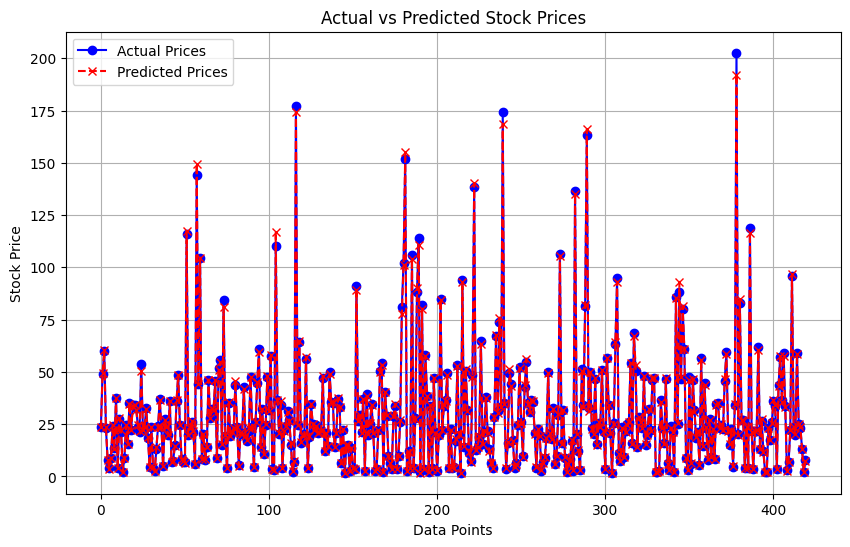

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', marker='o')
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='dashed', marker='x')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Data Points')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()